# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [11]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [12]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [13]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1648659396000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.10.3","count":333},"features":[{"type":"Feature","properties":{"mag":5.4,"place":"38 km SE of Champerico, Guatemala","time":1648656062613,"updated":1648659295724,"tz":null,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/us7000gyfc","detail":"https://earthquake.usgs.g


In [14]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [15]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 5.4, 'place': '38 km SE of Champerico, Guatemala', 'time': 1648656062613, 'updated': 1648659295724, 'tz': None, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us7000gyfc', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us7000gyfc.geojson', 'felt': 4, 'cdi': 5.5, 'mmi': 4.391, 'alert': 'green', 'status': 'reviewed', 'tsunami': 0, 'sig': 451, 'net': 'us', 'code': '7000gyfc', 'ids': ',us7000gyfc,', 'sources': ',us,', 'types': ',dyfi,losspager,origin,phase-data,shakemap,', 'nst': None, 'dmin': 1.864, 'rms': 0.47, 'gap': 159, 'magType': 'mww', 'type': 'earthquake', 'title': 'M 5.4 - 38 km SE of Champerico, Guatemala'}, 'geometry': {'type': 'Point', 'coordinates': [-91.6962, 14.0205, 55.93]}, 'id': 'us7000gyfc'}


In [16]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [-91.6962, 14.0205, 55.93], 'type': 'Point'}
{'alert': 'green',
 'cdi': 5.5,
 'code': '7000gyfc',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us7000gyfc.geojson',
 'dmin': 1.864,
 'felt': 4,
 'gap': 159,
 'ids': ',us7000gyfc,',
 'mag': 5.4,
 'magType': 'mww',
 'mmi': 4.391,
 'net': 'us',
 'nst': None,
 'place': '38 km SE of Champerico, Guatemala',
 'rms': 0.47,
 'sig': 451,
 'sources': ',us,',
 'status': 'reviewed',
 'time': 1648656062613,
 'title': 'M 5.4 - 38 km SE of Champerico, Guatemala',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',dyfi,losspager,origin,phase-data,shakemap,',
 'tz': None,
 'updated': 1648659295724,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us7000gyfc'}


In [17]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 5.4 - 38 km SE of Champerico, Guatemala
M 3.1 - 42 km NW of Aguadilla, Puerto Rico
M 2.5 - 2 km NNW of Tallaboa, Puerto Rico
M 3.3 - 14 km NNE of Carrizales, Puerto Rico
M 2.8 - Rat Islands, Aleutian Islands, Alaska
M 2.5 - 10 km S of Guánica, Puerto Rico
M 4.5 - 30 km NE of Lae, Papua New Guinea
M 4.4 - Rat Islands, Aleutian Islands, Alaska
M 4.3 - 156 km NE of Thang, India
M 2.6 - 87 km WSW of Akhiok, Alaska
M 2.8 - 57 km S of Whites City, New Mexico
M 2.6 - 67 km WNW of Atka, Alaska
M 4.7 - Kermadec Islands region
M 3.3 - 57 km S of Whites City, New Mexico
M 4.8 - 136 km NE of Tual, Indonesia
M 5.0 - Sunda Strait, Indonesia
M 3.4 - 4 km SW of Pāhala, Hawaii
M 5.1 - South Sandwich Islands region
M 3.7 - 8 km E of Pāhala, Hawaii
M 4.6 - 233 km SE of Sarangani, Philippines
M 4.5 - 61 km WSW of Zhaotong, China
M 4.5 - 148 km SSW of Tomohon, Indonesia
M 4.1 - 60 km W of San José de Jáchal, Argentina
M 4.6 - 5 km NW of Karakenja, Tajikistan
M 3.1 - 55 km S of Whites City, New Mexico
M 2

In [18]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

333


In [19]:
# print the first few lines of data

print(df.head())

   magnitude  depth
0       5.40  55.93
1       3.08  13.36
2       2.54  16.54
3       3.25  16.52
4       2.80  28.10


In [20]:
# print some descriptive statistics

print(df.describe())

        magnitude       depth
count  333.000000  333.000000
mean     3.755962   50.449178
std      0.956014   94.296996
min      2.450000   -1.230000
25%      2.800000   10.000000
50%      3.680000   11.000000
75%      4.600000   51.790000
max      6.000000  605.600000


<AxesSubplot:xlabel='magnitude', ylabel='depth'>

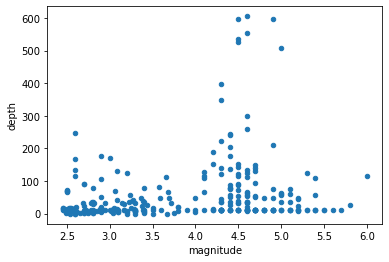

In [21]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [22]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [23]:
# read it back later

new_df = pd.read_csv('usgs_earthquake_data.csv')

print(new_df.head())

   Unnamed: 0  magnitude  depth
0           0       5.40  55.93
1           1       3.08  13.36
2           2       2.54  16.54
3           3       3.25  16.52
4           4       2.80  28.10


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [ ]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [ ]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

In [ ]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

In [ ]:
# print it more nicely

pp.pprint(data)

In [ ]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [1]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [2]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [3]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [4]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

Season Ticket renewals for the 2022 @UKFootball season end this Friday, April 1st!

Renew today through your My UK… https://t.co/botl3tashv


In [5]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Mar 29 23:00:04 +0000 2022',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [{'display_url': 'twitter.com/i/web/status/1…',
                        'expanded_url': 'https://twitter.com/i/web/status/1508942094437695493',
                        'indices': [116, 139],
                        'url': 'https://t.co/botl3tashv'}],
              'user_mentions': [{'id': 360022514,
                                 'id_str': '360022514',
                                 'indices': [36, 47],
                                 'name': 'Kentucky Football',
                                 'screen_name': 'UKFootball'}]},
 'favorite_count': 54,
 'favorited': False,
 'geo': None,
 'id': 1508942094437695493,
 'id_str': '1508942094437695493',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 

### Other API endpoints allow different types of searches

In [25]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @1Aw55: Night promotion 
@R__ubi @1Aw55 @1khtir @Mlkani_ @YPS26 @1krnaz @Ghz97 @_Sana_G @786H1 @1ziml @Hf33z #RPG @Azix103 @ChR71 @Mlngi…

RT @Zeba_Khn: FB💯
@Nysar8 @Sn__owy
@1khtir @Nra_19 @YPS26
@BkJ_0 @Hf33z  @Mlkani_
@Ghz79 @R__ubi @786H1
@1ziml @786H1 @Azix103 
@Smpti0 @Ch…

RT @BZ477: سونے سے پہلے حاضری لگائے صبح اٹھے گئے 100 فالوز کا یقینی آ ضافہ

اس ٹویٹ کو ریٹویٹ کرو اور اپنا اکاؤنٹ مینشن کریں
@azamraj12 @Ba…

RT @1fzall: #BBN 
👈جو دوست طویل مدت سے ٹوئیٹر استعمال کر رہے ہیں اور انکے فالورز کم ہیں صرف وہ اپنے آپ کو مینشن کریں اور ریٹویٹ 🔁 کریں تاکہ…

RT @786Nim: Star💫
@786Nim @NZPAK_ @Khrm23
@M_ZA_5 @NQI_9 @twtSMH
@s1_m_s @BBNPROMO @Titl_i
@1Aw55 @Azix103 @Yqbh2
@Aln_m6 @1kckt @Bhii68
@R…



In [26]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @Hardika_Yadav: जय श्री कृष्ण 🙏
भारतीय सेना में अहीर रेजिमेंट गठन हेतु एक बार फिर ट्विटर ट्रेंड रखा गया है।

हैशटैग - #अहीर_रेजिमेंट_हक़…

@HomelanderOP Antha naaya pathaley siripu tha varuthu😹😹😹🏃🏻

RT @BJP4MP: आज दिल्ली में आयोजित मध्य प्रदेश भाजपा संसदीय दल की बैठक में पूर्व प्रदेश संगठन महामंत्री श्री @SuhasBhagatBJP जी को नवीन दायि…

RT @Profdilipmandal: महंतों से बेटी बचाओ। https://t.co/vFr6jO9Bux

RT @jinnorine: Kuch nhai kiyo kiya hoya 
FATEJO SIZZLING HOLI



In [28]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

crying

Last week we were joined by Carmen and Drew from the @Reds to tell us about the foundation they have built in sport… https://t.co/LovWAuzz0V

Had a great visit at The University of Kentucky‼️@UKFootball 
@QBUniverseQBU @QBHitList @RabunFootball @coachheavyd… https://t.co/6mBgVdNqgT

Lisa L Peel would love to show you the #listing at 435 Park Avenue #Lexington #KY  #realestate… https://t.co/KORuorK73q

Another great day at the University of Kentucky! 👍🏻 https://t.co/mWDSKGX4PL

I am single-handedly keeping @redbaronpizza in business.



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

In [32]:
endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKYpres', 
    'count': 3
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['created_at'])
#prints the time for the last three tweets from the president

Mon Mar 28 18:14:16 +0000 2022
Mon Mar 21 18:17:57 +0000 2022
Fri Mar 11 17:27:48 +0000 2022


### Bonus: Streaming live tweets in real time 

In [9]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Wed Mar 30 16:56:47 +0000 2022
Niterói, Brasil, Brazil
Deus sabe de todas as coisas 🤍

Wed Mar 30 16:56:47 +0000 2022
الرويضة, المملكة العربية السعودية, المملكة العربية السعودية
تهنئة خاصه لمتابعيني 🌹🌹🌹🌹🌹 https://t.co/tJOwozmXg2

Wed Mar 30 16:56:47 +0000 2022
Sicily, Italy, Italy
After visiting almost EVERY corner of the gorgeous island and creating a complete series of 30 episodes, here are o… https://t.co/jlmu6OeG7x

Wed Mar 30 16:56:48 +0000 2022
Eastwood, England, United Kingdom
@VyzzzM @ab_dee10 @433 Des?

Wed Mar 30 16:56:48 +0000 2022
Bengaluru South, India, India
@andylapteff This is concerning indeed !!

Wed Mar 30 16:56:48 +0000 2022
Casale Monferrato, Piemonte, Italia
Foto appena pubblicata @ Casale Monferrato https://t.co/jHcwglCTM3

Wed Mar 30 16:56:48 +0000 2022
Punjab, Pakistan, Pakistan
غم تو اس بات کا ہے کہ عمران خان کے بعد کس کا چناؤ کرے ۔ ان ناکارہ کارتوسوں سے اللہ بچائے۔۔
#BehindYouSkipper 
#عمران_خان_بمقابلہ_چالیس_چور

Wed Mar 30 16:56:48 +0000 2022
Riyadh, Kingdo

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

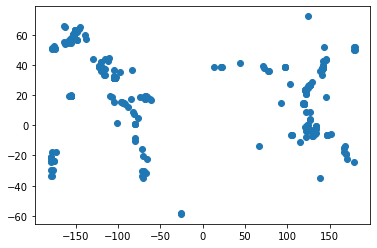

In [29]:
import matplotlib
#pp.pprint(quakes[0]['geometry'])
#print(type(quakes[0]['geometry']['coordinates'])) #returns long lat
l_coord = [] #list of lists of long lat coords
for i in quakes:
    j = i['geometry']['coordinates']
    j =  j[0:2] #j is long lat
    l_coord.append(j)
#print(l_coord)
x=[]
y=[]

for i in l_coord:
    x.append(i[0])
    y.append(i[1])

matplotlib.pyplot.scatter(x,y)
#x is long
#y is lat
    

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
